# Stock data test

In [1]:
import sys
sys.path.append("..")
from troubleshooter.anomaly.tseries.spot import SPOT, biSPOT, dSPOT, bidSPOT
import pandas as pd
import time
import plotly.express as px

## train data and test data

In [2]:
f = "../data/edf_stocks.csv"

df = pd.read_csv(f)

test_data = df["LOW"][df["DATE"] == "2017-02-09"].values

train_data = df["LOW"][(df['DATE'] == '2017-02-08') | (df['DATE'] == '2017-02-07') | (df['DATE'] == '2017-02-06')].values

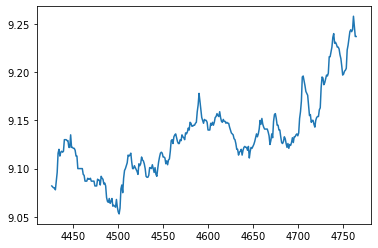

In [3]:
df["LOW"][df['DATE'] == '2017-02-08'].plot()

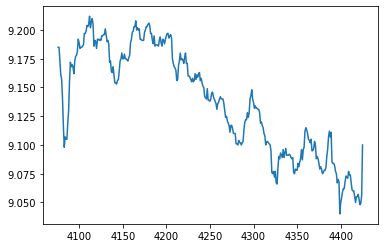

In [4]:
df["LOW"][df['DATE'] == '2017-02-07'].plot()

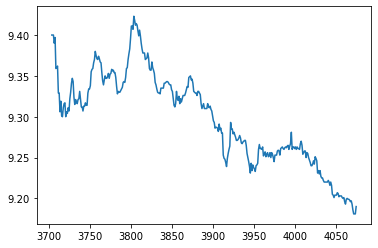

In [5]:
df["LOW"][df['DATE'] == '2017-02-06'].plot()

In [6]:
px.line(train_data, labels={"index": "time"})

In [7]:
# parameters
q = 1e-3  # risk parameter
d = 10

 15%|█▍        | 56/379 [00:00<00:01, 206.76it/s]Initial threshold : 9.38
Number of peaks : 21
100%|██████████| 379/379 [00:00<00:00, 1388.52it/s]


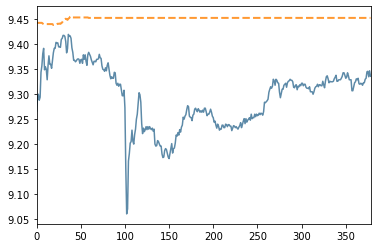

In [8]:
spot = SPOT(q)
spot.fit(train_data, test_data)  # data import
spot.initialize()  # initialization step
results = spot.run()  # run
spot.plot(results)

  8%|▊         | 29/379 [00:00<00:01, 269.66it/s]Initial threshold : {'up': 9.38, 'down': 9.061}
Number of peaks : {'up': 21, 'down': 20}
100%|██████████| 379/379 [00:00<00:00, 1129.69it/s]


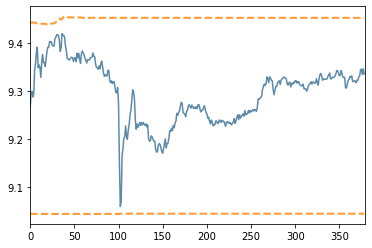

In [9]:
bispot = biSPOT(q)
bispot.fit(train_data, test_data)  # data import
bispot.initialize()  # initialization step
results = bispot.run()  # run
bispot.plot(results)

 49%|████▊     | 184/379 [00:00<00:00, 871.57it/s]Initial threshold : 0.031899999999998485
Number of peaks : 21
100%|██████████| 379/379 [00:00<00:00, 1529.65it/s]


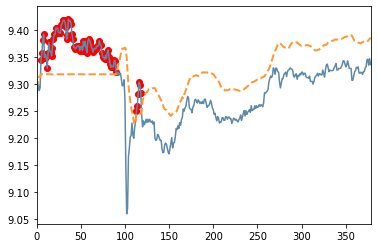

In [10]:
dspot = dSPOT(q,d)
dspot.fit(train_data, test_data)  # data import
dspot.initialize()  # initialization step
results = dspot.run()  # run
dspot.plot(results)

 27%|██▋       | 101/379 [00:00<00:00, 974.10it/s]Initial threshold : {'up': 0.031899999999998485, 'down': -0.02599999999999092}
Number of peaks : {'up': 21, 'down': 21}
100%|██████████| 379/379 [00:00<00:00, 1090.51it/s]


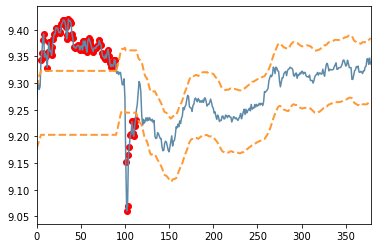

In [11]:
bidspot = bidSPOT(q,d)
bidspot.fit(train_data, test_data)  # data import
bidspot.initialize()  # initialization step
results = bidspot.run()  # run
bidspot.plot(results)

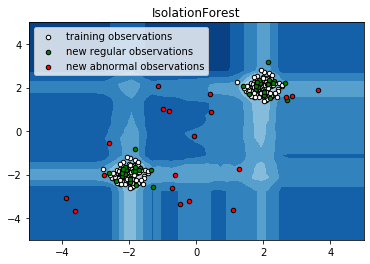

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

rng = np.random.RandomState(42)

# Generate train data
X = 0.3 * rng.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
# Generate some regular novel observations
X = 0.3 * rng.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
# Generate some abnormal novel observations
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))

# fit the model
clf = IsolationForest(max_samples=100, random_state=rng)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 50), np.linspace(-5, 5, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("IsolationForest")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white',
                 s=20, edgecolor='k')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green',
                 s=20, edgecolor='k')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red',
                s=20, edgecolor='k')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend([b1, b2, c],
           ["training observations",
            "new regular observations", "new abnormal observations"],
           loc="upper left")
plt.show()